# Using **ANN106**

In [11]:
import sys
sys.path += ["../"]

import numpy as np

import ann106 as ann

1. Create your own class

In [12]:
def my_step_function(sum_value):
    return ann.activation_functions.step_function(sum_value, threshold=0.0, greater_equal_value=1.0, smaller_value=0.0)

class Perceptron(ann.base.ArtificialNeuralNetwork):
    def __init__(self):
        super().__init__()
        self.prediction_elements_tuple = {
            "X": True,
            "y": False,
            "y_": False,
            "all_y_": False,
            "error": True
        }
        self.name = "Perceptron"
        self.layers = [ann.base.Layer(2, 1, my_step_function)]

    def update_weights(self, prediction_element):
        # extract needed elements
        cur_X, cur_prediction_error = prediction_element 
        cur_prediction_error = ann.loss_functions.get_total_loss(cur_prediction_error)
        
        delta_weights = cur_prediction_error*cur_X
        self.layers[0].weights = self.layers[0].weights+delta_weights

        self.layers[0].bias = self.layers[0].bias + (cur_prediction_error)

    def loss_function(self, y, y_):
        return {"Sum Loss":ann.loss_functions.sum_error(y, y_)} # y - y_

    def predict(self, x):
        return x

    def eval(self, X, y):
        absolute_error = 0

        for i, x in enumerate(X):
            absolute_error += np.abs(y[i] - self.forward(x))

        return absolute_error

In [13]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

and_labels = np.array([0, 0, 0, 1])
or_labels = np.array([0, 1, 1, 1])
xor_labels = np.array([0, 1, 1, 0])

model = Perceptron()
# model.add_layer(2, 1, ann.activation_functions.heaviside)
model.train(X=X, y=or_labels, epochs=10, parallel_computing=False, print_ever_x_steps=2)
model.eval(X=X, y=or_labels)



--------------------------------
Training - 12:52 14.01.2025

| epoch:     9 || step:       40 || ETA:  0:00:00 || total loss:    0.000 ||  Sum Loss:    0.000 |

Total Progress: |##########|    Epoch Progress: |##########|



Congratulations!!!🥳
🚀 Your model 🚀 waits here for you:
      -> './models\Perceptron.pkl'


np.float64(0.0)

In [14]:
model = Perceptron()
model.train(X=X, y=xor_labels, epochs=10, parallel_computing=False)
model.eval(X=X, y=xor_labels)



--------------------------------
Training - 12:52 14.01.2025

| epoch:     9 || step:       40 || ETA:  0:00:00 || total loss:   -0.111 ||  Sum Loss:   -0.111 |

Total Progress: |##########|    Epoch Progress: |##########|



Congratulations!!!🥳
🚀 Your model 🚀 waits here for you:
      -> './models\Perceptron.pkl'


np.float64(2.0)

In [15]:
model = Perceptron()
model.train(X=X, y=and_labels, epochs=10, parallel_computing=False)
model.eval(X=X, y=and_labels)



--------------------------------
Training - 12:52 14.01.2025

| epoch:     9 || step:       40 || ETA:  0:00:00 || total loss:    0.000 ||  Sum Loss:    0.000 |

Total Progress: |##########|    Epoch Progress: |##########|



Congratulations!!!🥳
🚀 Your model 🚀 waits here for you:
      -> './models\Perceptron.pkl'


np.float64(0.0)

Or use the predefined version

In [16]:
ann.neural_networks.Perceptron

ann106.neural_networks.Perceptron

In [17]:
model = ann.neural_networks.Perceptron()
model.train(X=X, y=and_labels, epochs=10, parallel_computing=False)
model.eval(X=X, y=and_labels)



--------------------------------
Training - 12:52 14.01.2025

| epoch:     9 || step:       40 || ETA:  0:00:00 || total loss:    0.000 ||  Sum Loss:    0.000 |

Total Progress: |##########|    Epoch Progress: |##########|



Congratulations!!!🥳
🚀 Your model 🚀 waits here for you:
      -> './models\Perceptron.pkl'


np.float64(0.0)

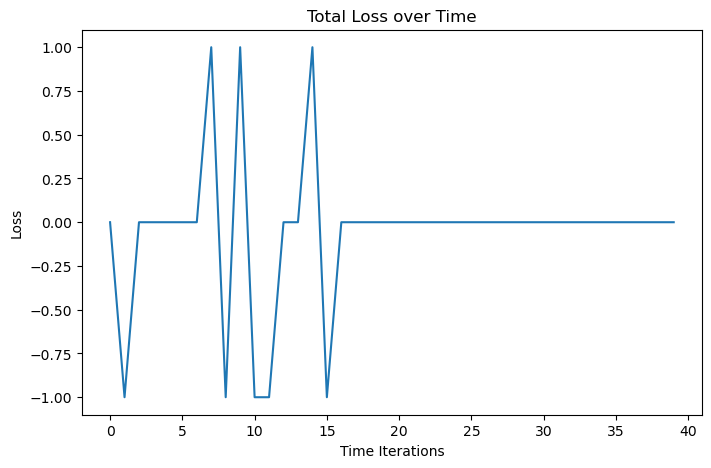

In [18]:
model.loss_plot(width=8, height=5, smoothing_size=1, should_show=True)

In [19]:
model.train_history

{'start-time': ['14.1.2025 12:52:40'],
 'end-time': ['14.1.2025 12:52:40'],
 'epochs': [9],
 'total-steps': [40],
 'batch-size': [1],
 'all-errors': [{'Sum Loss': [0.0,
    -1.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    1.0,
    -1.0,
    1.0,
    -1.0,
    -1.0,
    0.0,
    0.0,
    1.0,
    -1.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0]}]}

### Using ANN106 with Scikit-Learn

In [20]:
def my_step_function(sum_value):
    return ann.activation_functions.step_function(sum_value, threshold=0.0, greater_equal_value=1.0, smaller_value=0.0)

class Perceptron(ann.sklearn.base.ArtificialNeuralNetwork):
    def __init__(self):
        super().__init__()
        self.prediction_elements_tuple = {
            "X": True,
            "y": False,
            "y_": False,
            "all_y_": False,
            "error": True
        }
        self.name = "Perceptron"
        self.layers = [ann.base.Layer(2, 1, my_step_function)]

    def update_weights(self, prediction_element):
        # extract needed elements
        cur_X, cur_prediction_error = prediction_element 
        cur_prediction_error = ann.loss_functions.get_total_loss(cur_prediction_error)
        
        delta_weights = cur_prediction_error*cur_X
        self.layers[0].weights = self.layers[0].weights+delta_weights

        self.layers[0].bias = self.layers[0].bias + (cur_prediction_error)

    def loss_function(self, y, y_):
        return {"Sum Loss":ann.loss_functions.sum_error(y, y_)} # y - y_

    def predict(self, x):
        return x

    def eval(self, X, y):
        absolute_error = 0

        for i, x in enumerate(X):
            absolute_error += np.abs(y[i] - self.forward(x))

        return absolute_error

In [21]:
model = Perceptron()
model.fit(X=X, y=and_labels, epochs=10, parallel_computing=False)
model.eval(X=X, y=and_labels)



--------------------------------
Training - 12:52 14.01.2025

| epoch:     9 || step:       40 || ETA:  0:00:00 || total loss:    0.000 ||  Sum Loss:    0.000 |

Total Progress: |##########|    Epoch Progress: |##########|



Congratulations!!!🥳
🚀 Your model 🚀 waits here for you:
      -> './models\Perceptron.pkl'


np.float64(0.0)